<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import tensorflow as tf
%tensorflow_version 2.x
from scipy import stats

TensorFlow is already loaded. Please restart the runtime to change versions.


# Problem 1

define three surfaces and mark the critical points on each one

In [0]:
# surface functions
def upward_paraboloid(x, y):
  return (10 * x**2) + (10 * y**2)

def downward_paraboloid(x, y):
  return (-10 * x**2) + (-10 * y**2)

def hyperbolic_paraboloid(x, y):
    return (10 * x**2) - (10 * y**2)

In [0]:
X = [np.linspace(-6, 6, 100),np.linspace(-6, 6, 100)] 
X[0], X[1] = np.meshgrid(X[0], X[1])
y1 = upward_paraboloid(X[0], X[1])
y2 = downward_paraboloid(X[0],X[1])
y3 = hyperbolic_paraboloid(X[0],X[1])
Y = [y1, y2, y3]

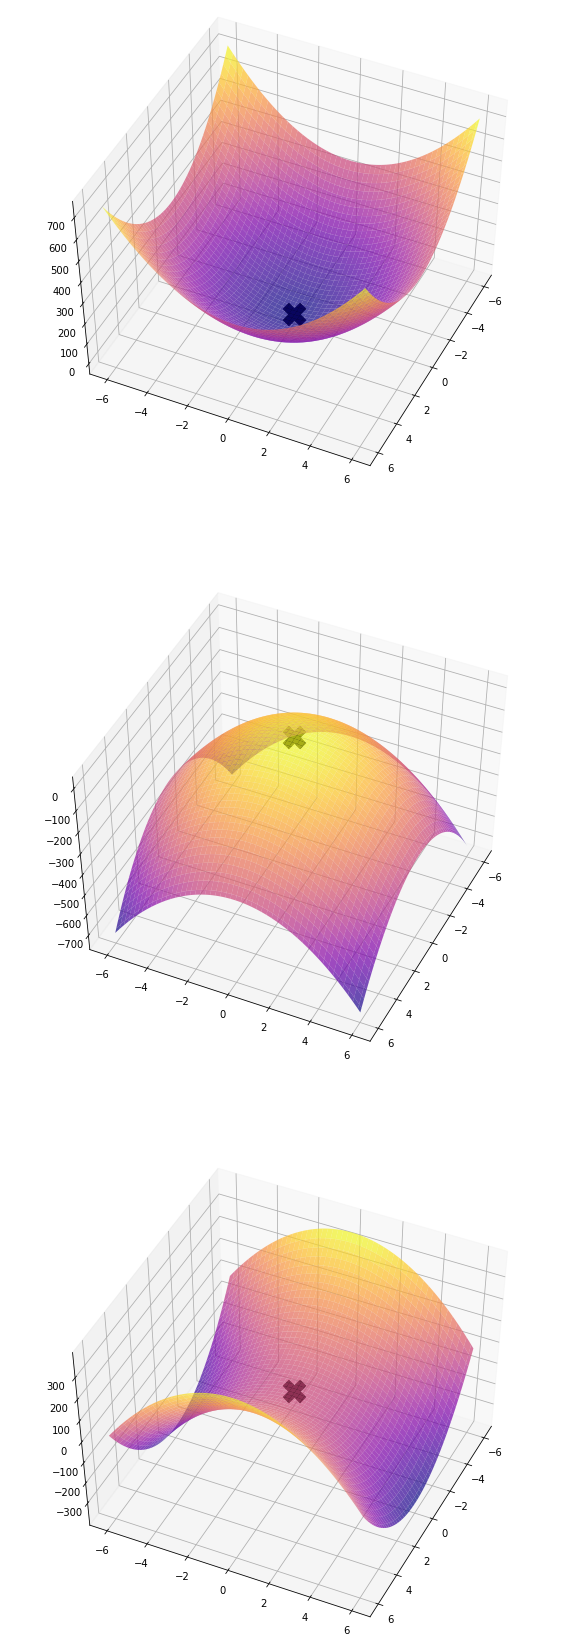

In [26]:
fig, axs = plt.subplots(3, subplot_kw=dict(projection='3d'), figsize=(10, 30))

for i in range(3):
  axs[i].scatter(0,0,0, s=500, c='black', marker='X')
  axs[i].plot_surface(X[0], X[1], Y[i], cmap='plasma', alpha=0.7)
  axs[i].view_init(50, 25)


plt.show()

# may need to scroll around or zoom out to view all graphs

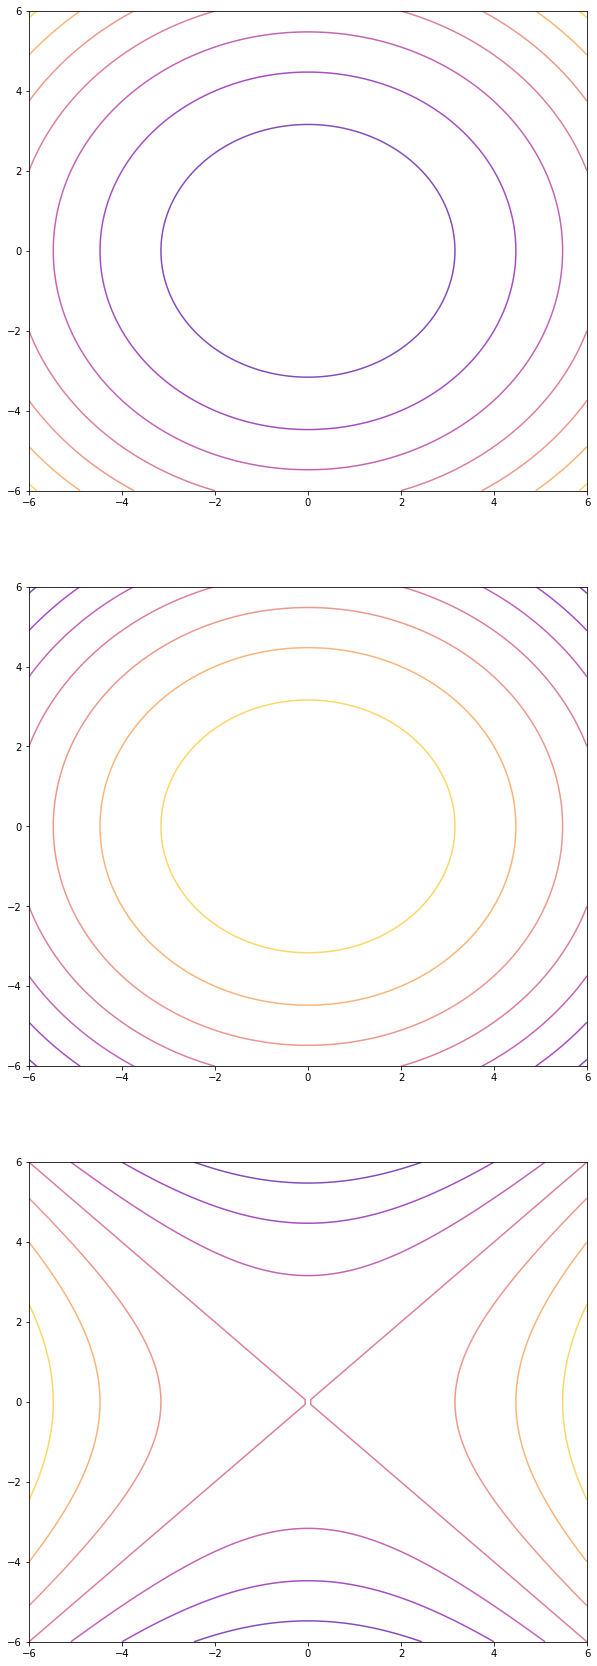

In [27]:
# plot 2D contour graphs
fig, axs = plt.subplots(3, figsize=(10, 30))

for i in range(3):
  axs[i].contour(X[0], X[1], Y[i], cmap='plasma', alpha=0.7)

plt.show()

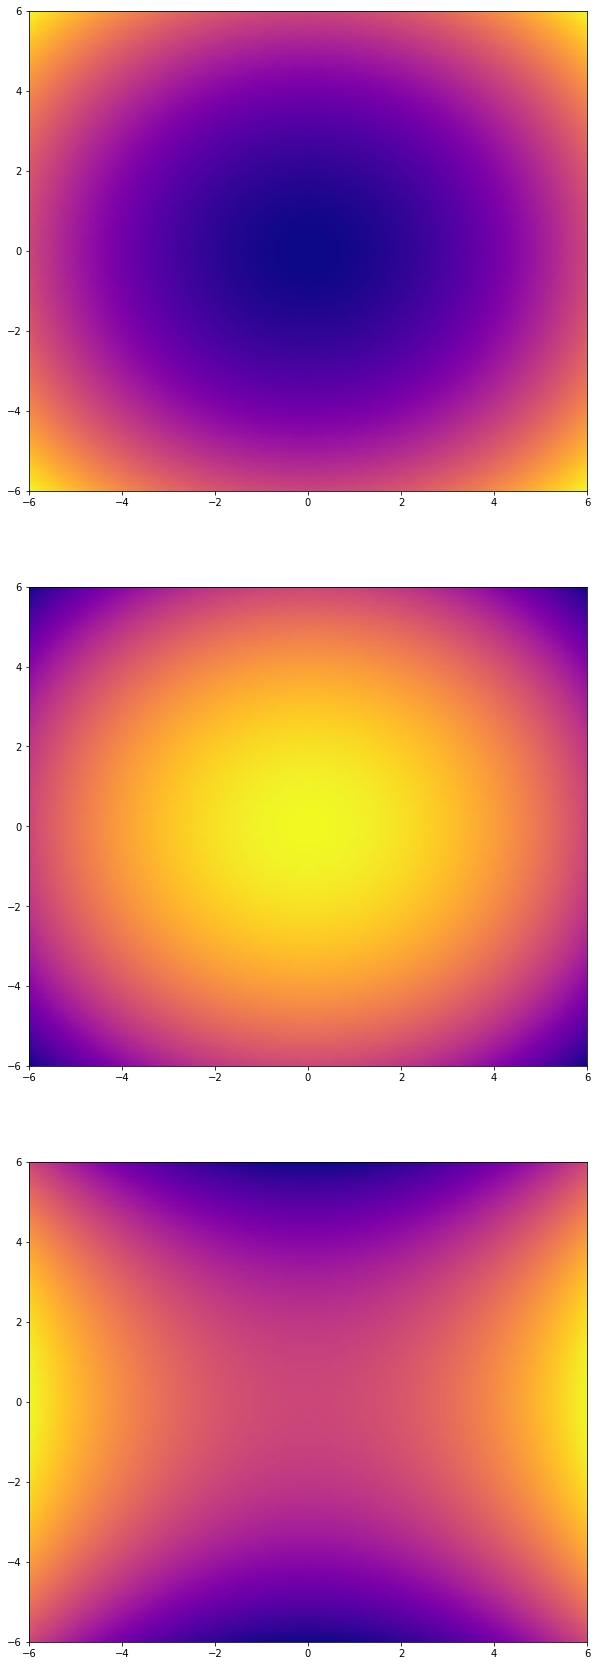

In [37]:
# plot 2D contour graphs
fig, axs = plt.subplots(3, figsize=(10, 30))

for i in range(3):
  axs[i].pcolormesh(X[0], X[1], Y[i].reshape(X[1].shape), shading='gouraud', cmap=plt.cm.plasma)

plt.show()

# Problem 2
Multi-dimensional gradient descent implemented in NumPy

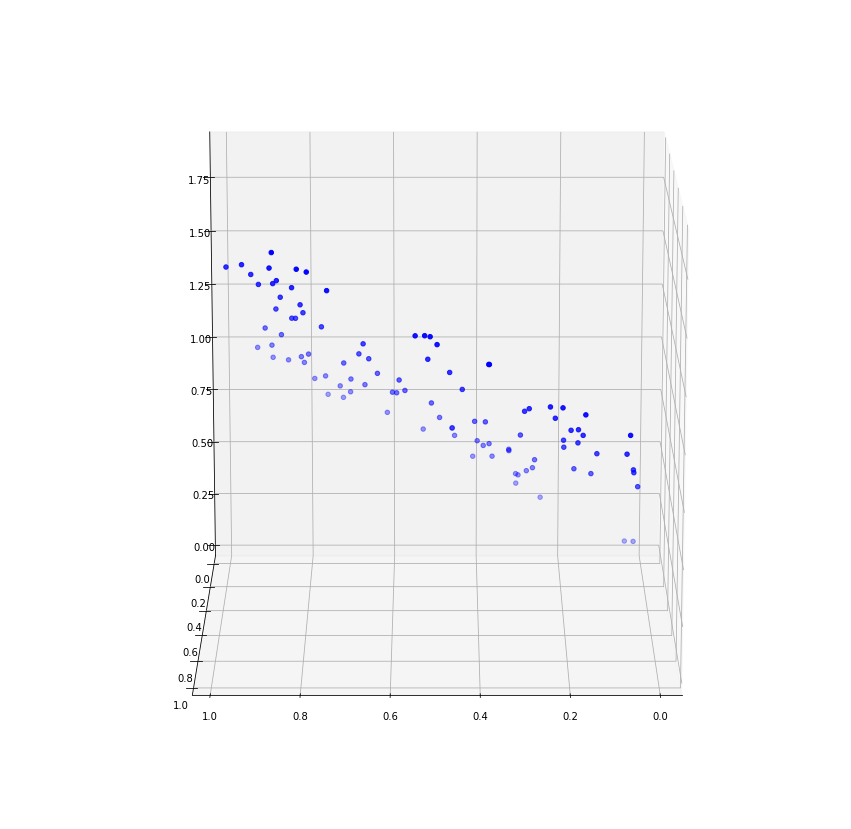

In [0]:
m = 100
n = 80
np.random.seed(21)

# create random data
X = np.array([np.random.rand(m, 1), np.random.rand(m, 1)])
# simple relation that can be regressed easily
Y = np.add(X[0], X[1])

# plot random data
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 15))
ax.scatter(X[0], X[1], Y, color='blue')
ax.view_init(15,90)
plt.show()

In [0]:
# test train split
train_x = [X[0][:n], X[1][:n]]
test_x = [X[0][n:], X[1][n:]]

train_y = Y[:80]
test_y = Y[80:]

$ \hat y = b + w_1x_1 + w_2 x_2 $


so define $ w = (w_0, w_1, w_2) $ and $ x = (1, x_1, x_2)$ so that $ \hat y = w \cdot x $

In [0]:
# add x_0 = 1

X_train_b = np.column_stack([np.ones((n, 1)), train_x[0], train_x[1]])
print('Shape: ', X_train_b.shape)

# print the first five rows
print(X_train_b[:5])

Shape:  (80, 3)
[[1.         0.04872488 0.69052178]
 [1.         0.28910966 0.77924663]
 [1.         0.72096635 0.04722913]
 [1.         0.02161625 0.0745612 ]
 [1.         0.20592277 0.60484454]]


In [0]:
# number of epochs
epochs = 20
lr = 0.01
np.random.seed(42)

weight = np.random.rand(3,1)

In [0]:
# check dimensions for vectorized training
print(weight.shape)
print(train_y.shape)
print((X_train_b.dot(weight)).shape)
print((X_train_b.T.dot(X_train_b.dot(weight))).shape)

(3, 1)
(80, 1)
(80, 1)
(3, 1)


In [0]:
# training
for epoch in range(epochs):
    gradient = 1/m * X_train_b.T.dot(X_train_b.dot(weight) - train_y)
    weight = weight - lr * gradient

In [0]:
# create array with x1=0 and x1=2
X_new = np.array([[1], [2], [3]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((3, 1)), X_new])

# make predictions
y_hat = X_new_b.T.dot(weight)
print(y_hat)

[[1.99750326]
 [4.37244461]]


In [0]:
X_test_b = np.column_stack([np.ones((m-n, 1)), test_x[0], test_x[1]])
# check shapes of vectors
print(weight.shape)
print(test_y.shape)
print((X_test_b.dot(weight)).shape)
print((X_test_b.T.dot(X_test_b.dot(weight))).shape)

(3, 1)
(20, 1)
(20, 1)
(3, 1)


In [0]:
# make preditions
y_hat = X_test_b.dot(weight)
print(y_hat[:5])

[[1.84627716]
 [1.01362405]
 [0.90978337]
 [1.39779877]
 [1.16107757]]


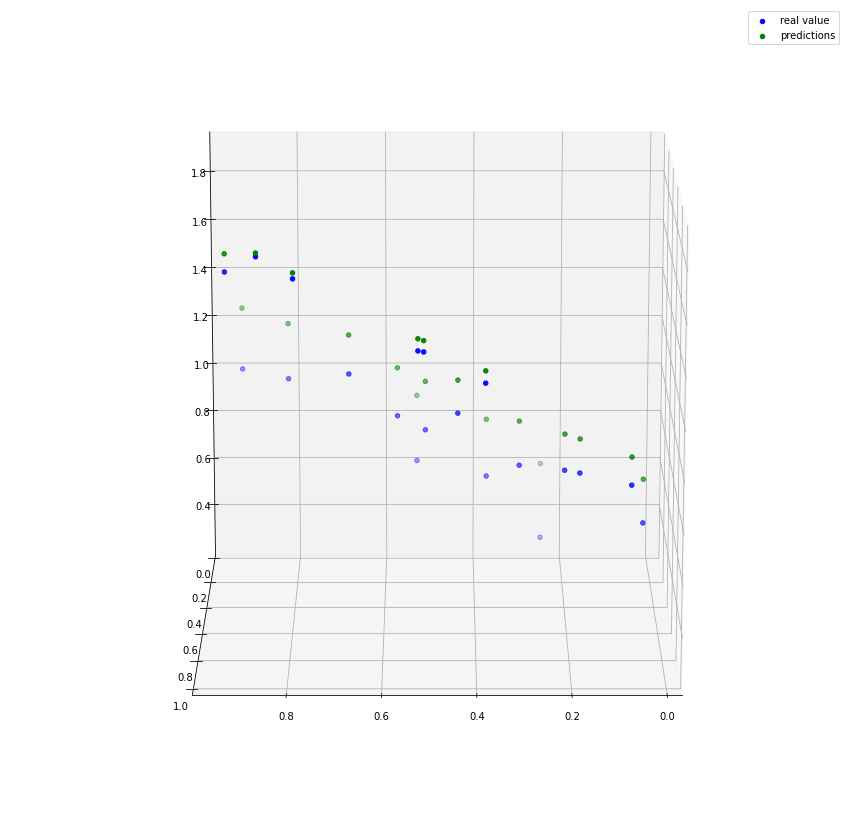

In [0]:
# plot predictions versus real values

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[0], test_x[1], test_y, color='blue', label='real value')
ax.scatter(test_x[0], test_x[1], y_hat, color='green', label='predictions')
ax.view_init(15,90)
ax.legend()
plt.show()

# Problem 3
Load the mnist dataset. Average out each digit and display what the average looks like

In [0]:
# Load data

# the built in function automatically loads this with a test train split,
# I will just use the training data for averaging 
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
# array to store all 10 of the 28x28 results
digits = np.zeros((10,28,28))

# frequency of each digit, used for averaging
freq = np.zeros(10)

# loop through training data and add it to its respective result array
for i in range(0, len(y_train)):
    freq[y_train[i]] += 1
    digits[y_train[i]] += (x_train[i])

# average out each matrix
for i in range(0,10):
    digits[i] /= freq[i]

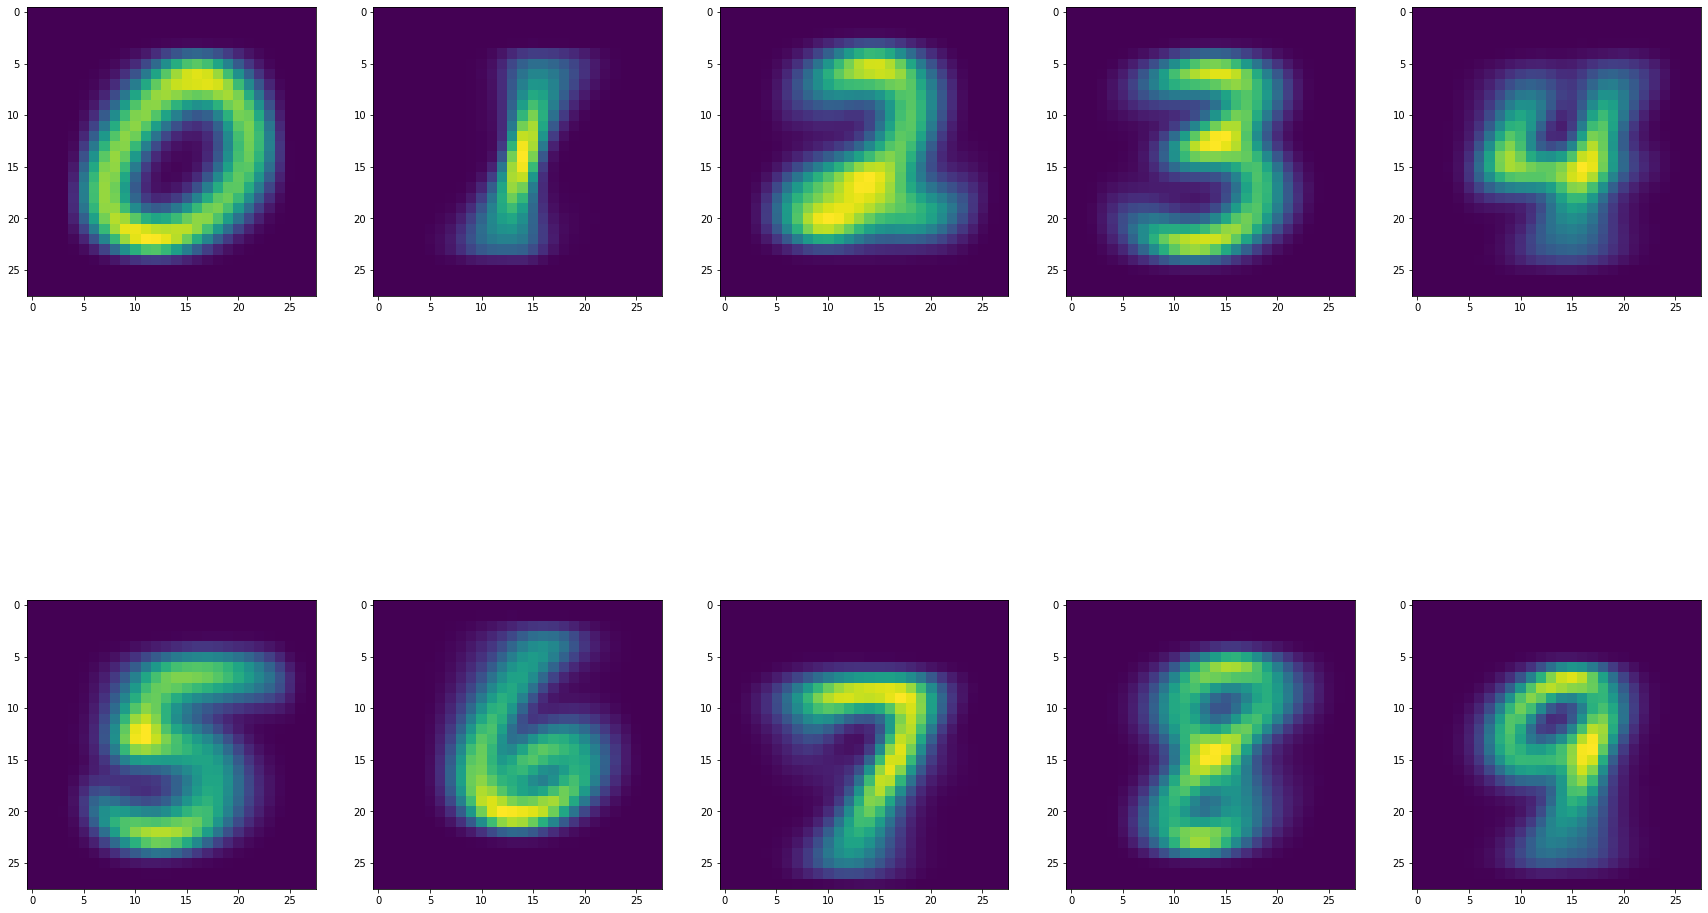

In [0]:
# plot results

fig, axs = plt.subplots(2,5, figsize=(30, 20))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(digits[i])